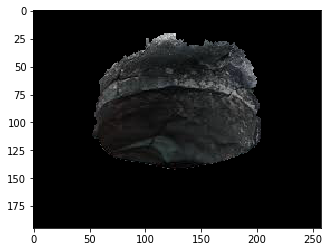

In [2]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt
# Load an color image 
img = cv2.imread('p77.jfif')

#edges = cv2.Canny(img,100,200)
#cv2.imshow('output',edges)
# fgbg = cv2.createBackgroundSubtractorMOG()
# fgmask = fgbg.apply(img)

mask=np.zeros(img.shape[:2],np.uint8)

bgdModel=np.zeros((1,65),np.float64)
fgdModel=np.zeros((1,65),np.float64)

rect=(15,15,240,175)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2=np.where((mask==2)|(mask==0),0,1).astype('uint8')
img2=img*mask2[:,:,np.newaxis]
# img22=img2
# edges = cv2.Canny(img2,100,200)
plt.imshow(img2)


plt.show()
cv2.imshow('input',img)
# img3 = cv2.circle(img2, (125, 80), 100, (0,255,0), 5)

# cv2.imshow('output',img2)
# cv2.imshow('edges',edges)
# cv2.imshow('orignal grabcut',img22)



cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
img = cv2.imread('pot02.jpg',1)
# edges = cv2.Canny(img,100,200)

image3=img
gray = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
 
# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)
 
# find contours in thresholded image, then grab the largest
# one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
c = max(cnts, key=cv2.contourArea)

In [4]:
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])


In [5]:
# draw the outline of the object, then draw each of the
# extreme points, where the left-most is red, right-most
# is green, top-most is blue, and bottom-most is teal
cv2.drawContours(image3, [c], -1, (0, 255, 255), 2)
cv2.circle(image3, extLeft, 8, (0, 0, 255), -1)
cv2.circle(image3, extRight, 8, (0, 255, 0), -1)
cv2.circle(image3, extTop, 8, (255, 0, 0), -1)
cv2.circle(image3, extBot, 8, (255, 255, 0), -1)
 
# show the output image
cv2.imshow("Image", image3)
cv2.waitKey(0)

-1